# Airline Prediction System

### 1) Problem Statement

In this project, we want to explore airline pricing data in India using Python libraries like Pandas, Numpy, Matplotlib, and Seaborn. Our goal is to analyze key factors such as travel class, flight duration, and more, to understand how they influence ticket prices. By studying relationships between different variables, we aim to uncover insights that can help optimize travel planning and make air travel more cost-effective and reliable.

### 2) Collecting the data

##### Import the required Python libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset using Pandas

In [38]:
df = pd.read_csv(r"C:\Users\mestr\Downloads\Indian Airlines.csv")
df.head(10)
#df.count()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


##### About the dataset - Variables:

1) Airline: The "airline" column stores the names of the airlines, making it a categorical feature with six distinct airline options.
2) Flight: The "Flight" column contains the flight codes for the planes, and it is categorized as a categorical feature.
3) Source City: The "City" column represents the departure city of the flight, and it is a categorical feature with six unique cities.
4) Departure Time: This is a categorical feature created by grouping time periods, providing information about the flight's departure time, with six unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a categorical feature created by grouping time intervals, containing six distinct time labels, and it stores information about the flight's arrival time.
7) Destination City: The "City" column represents the destination city where the flight will land. It is a categorical feature with six unique cities.
8) Class: This categorical feature contains information about the seat class, with two distinct values: Business and Economy.
9) Duration: This is a continuous feature that represents the total travel time between cities, measured in hours.
10)Days Left: This is a derived characteristic calculated by subtracting the booking date from the trip date.
11) Price: The target variable contains information about the ticket price.

In [39]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

##### About the columns:

1) In airline column there are 6 unique airlines: SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India
2) In source_city & destination_city there are 6 unique cities: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai
3) In arrival & departure columns there are 6 different timings: Night, Morning, Early_Morning, Afternoon, Evening, Late_Night
4) In class column there are 2 different classes: Economy, Business

In [40]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


### 3) Exploratory Data Analysis






##### 1. What are number of flights operated by each airline?

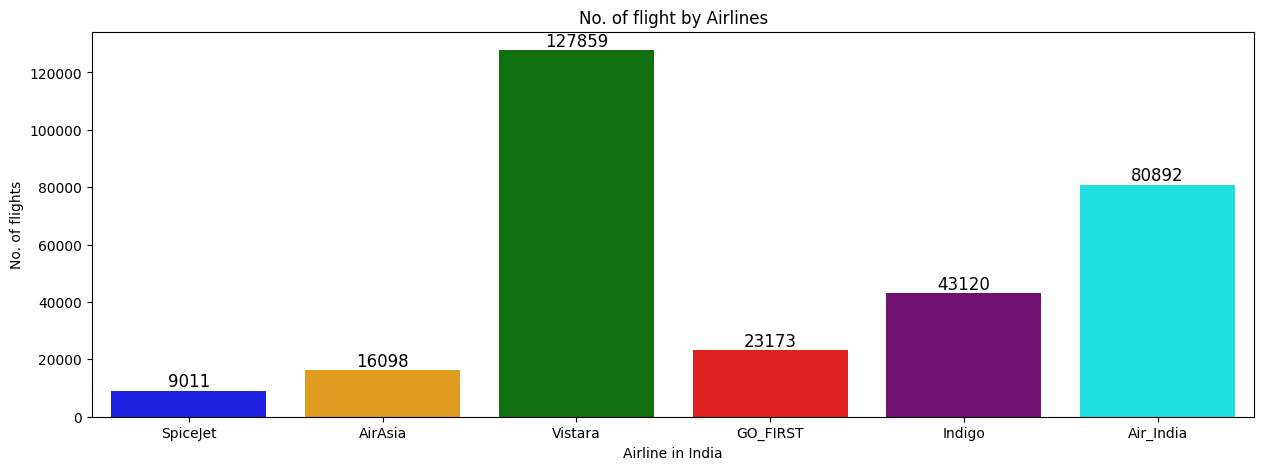

In [41]:
from turtle import title
# Define a color palette
color_palette = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df, palette=color_palette)
NF.set(xlabel='Airline in India', ylabel='No. of flights', title='No. of flight by Airlines')
# Adding numbers on the bars
for p in NF.patches:
    NF.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
plt.show(NF)


From the above figure, we can see 'Vistara' has maximum no. of fights followed by 'Air India' while 'Spice Jet' has least no. of flights

##### 2. What is price range according to class of travel?

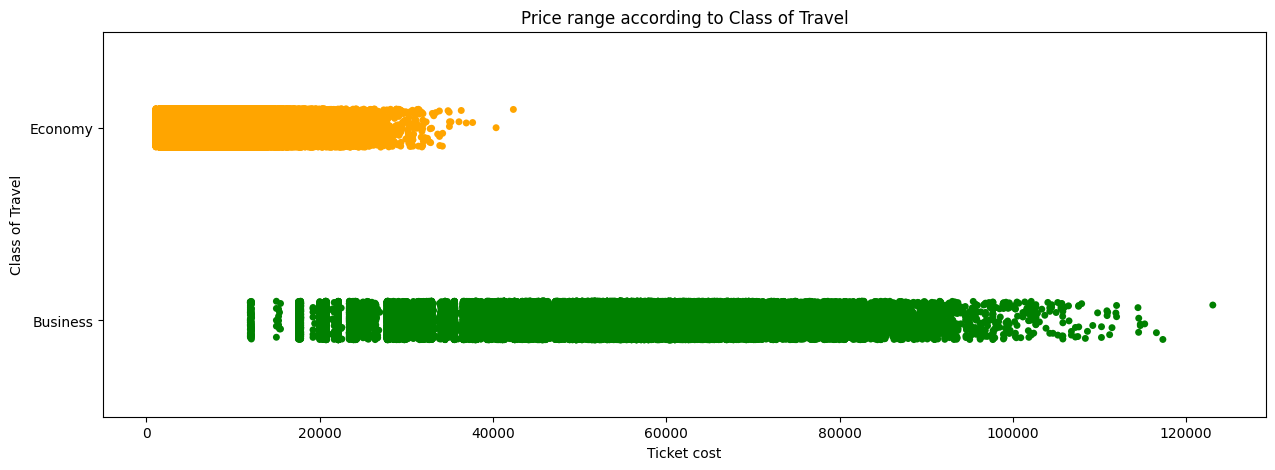

In [42]:
from turtle import title
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df, palette={'Business': 'green', 'Economy': 'orange'})
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price range according to Class of Travel')
plt.show(CE)

The figure above reveals that Economy class tickets typically range in price from 2,500 to 22,500 rupees, while Business class tickets generally fall between 25,000 and 95,000 rupees.

##### 3. What is availability of Tickets according to class of travel?

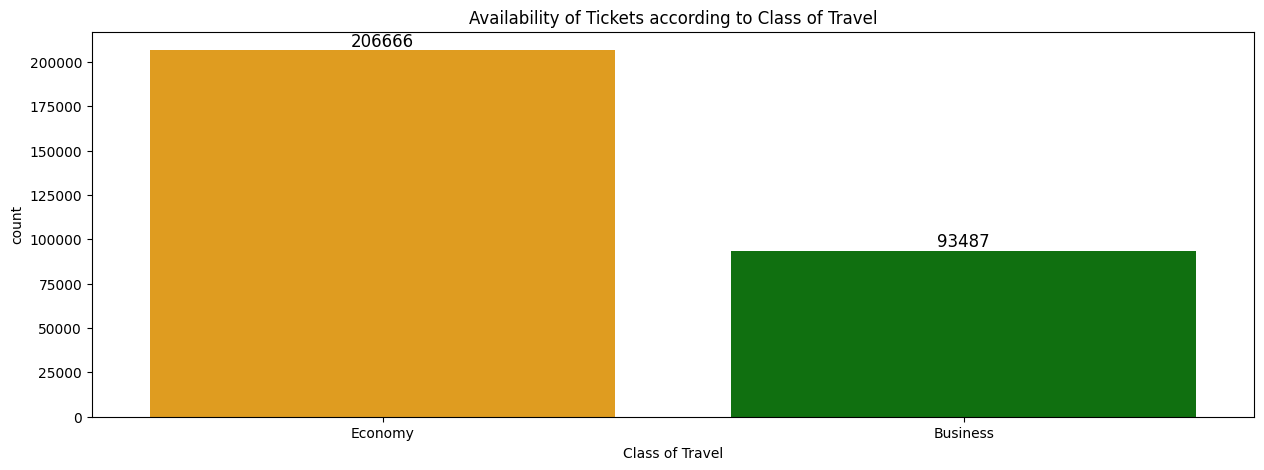

In [43]:
from turtle import title
# Define a color palette
color_palette = ['orange', 'green']
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df, palette=color_palette)
TA.set(xlabel='Class of Travel', title='Availability of Tickets according to Class of Travel')
# Adding numbers on the bars
for p in TA.patches:
    TA.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
plt.show(TA)

The figure above shows that the availability of Economy class tickets is nearly double that of Business class tickets. This disparity can be attributed to the fact that only two airlines: Air India and Vistara offer Business class tickets, whereas all airlines provide Economy class options.

##### 4. What is price of ticket for different airlines based on duration of flight? 

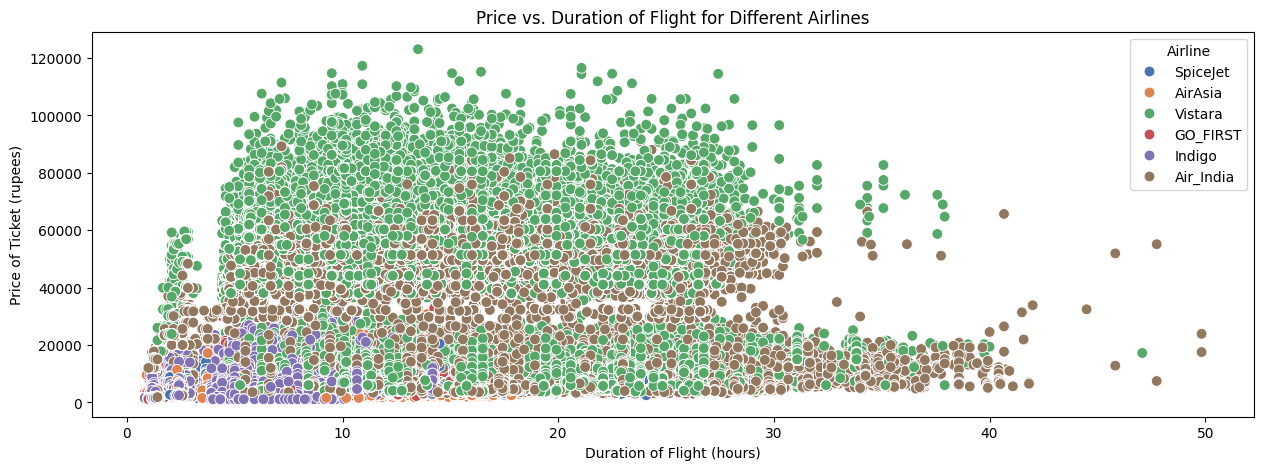

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
#vistara_df = df[df['airline'] == 'Vistara'] #Plot for any one airline
plt.figure(figsize=(15, 5))
PD = sns.scatterplot(data=df, x='duration', y='price', hue='airline', palette='deep', s=60)

# Set labels and title
PD.set(xlabel='Duration of Flight (hours)', ylabel='Price of Ticket (rupees)', 
        title='Price vs. Duration of Flight for Different Airlines')

plt.legend(title='Airline')
plt.show()


The figure above illustrates how ticket prices vary with flight duration. The higher concentration of green and brown points indicates that Vistara and Air India operate the most flights.

##### 5. How do ticket prices vary across different airlines and class of travel?

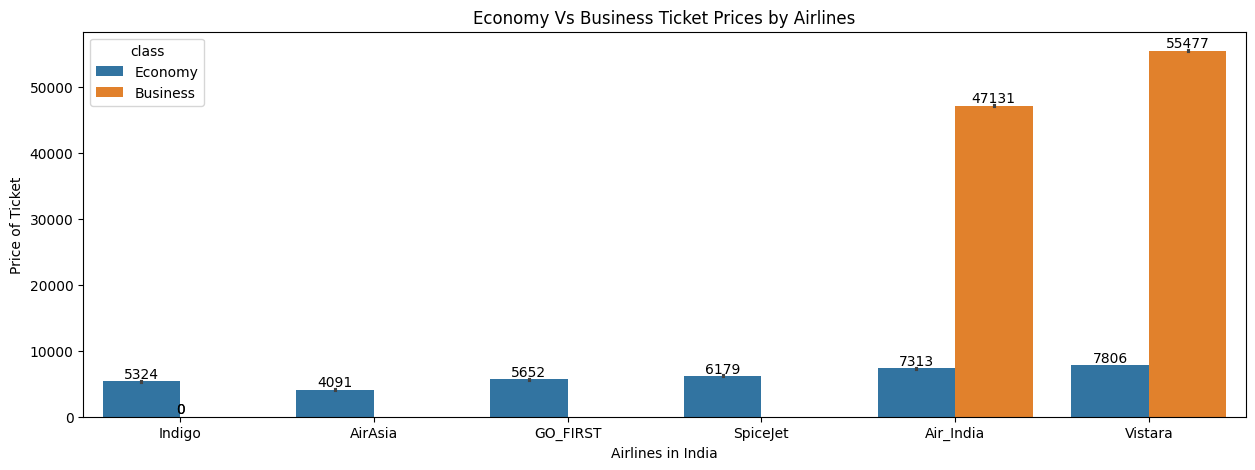

In [45]:
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
# Adding numbers on the bars
for p in AS.patches:
    AS.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10)
plt.show(AS)

The figure shows that Air Asia offers the cheapest Economy class tickets, while Indigo, Go First, and Spice Jet have similar pricing. Air India and Vistara are significantly more expensive, whereas the others are low-cost carriers. In Business class, Vistara commands a higher price than Air India, reflecting its superior quality and customer service.

##### 6. How do airline ticket prices vary depending on when you buy them?

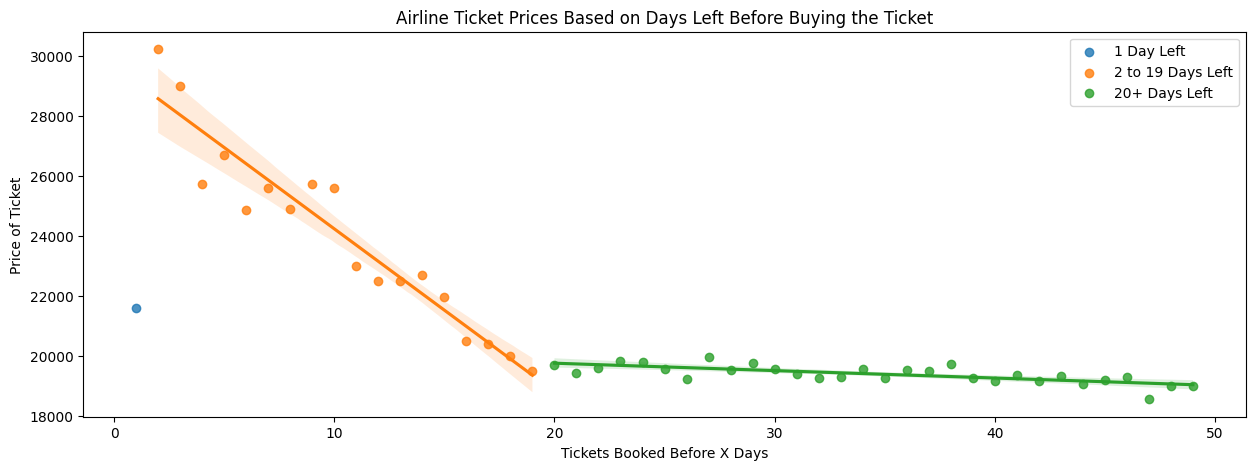

In [46]:
# Grouping the data by days_left and calculating the mean price
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15, 5))
ax = plt.axes()

# Plotting the regression lines
sns.regplot(x=df_temp.loc[df_temp['days_left'] == 1].days_left, 
            y=df_temp.loc[df_temp['days_left'] == 1].price, 
            data=df_temp, fit_reg=False, ax=ax, label='1 Day Left')
sns.regplot(x=df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, 
            y=df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, 
            data=df_temp, fit_reg=True, ax=ax, label='2 to 19 Days Left')
sns.regplot(x=df_temp.loc[df_temp['days_left'] >= 20].days_left, 
            y=df_temp.loc[df_temp['days_left'] >= 20].price, 
            data=df_temp, fit_reg=True, ax=ax, label='20+ Days Left')

# Setting labels and title
ax.set(xlabel='Tickets Booked Before X Days', 
       ylabel='Price of Ticket', 
       title='Airline Ticket Prices Based on Days Left Before Buying the Ticket')
# Adding the legend
plt.legend()
plt.show(ax)


The figure shows that ticket prices gradually increase until about 20 days before the flight, then rise sharply until the last day, only to drop one day before departure. This trend indicates that most travelers book tickets within 2 to 3 weeks of their flight, allowing airlines to maximize profits. The last-minute price drop is a strategy to fill seats.

##### 7. How does price of ticket vary depending on duration of flight?

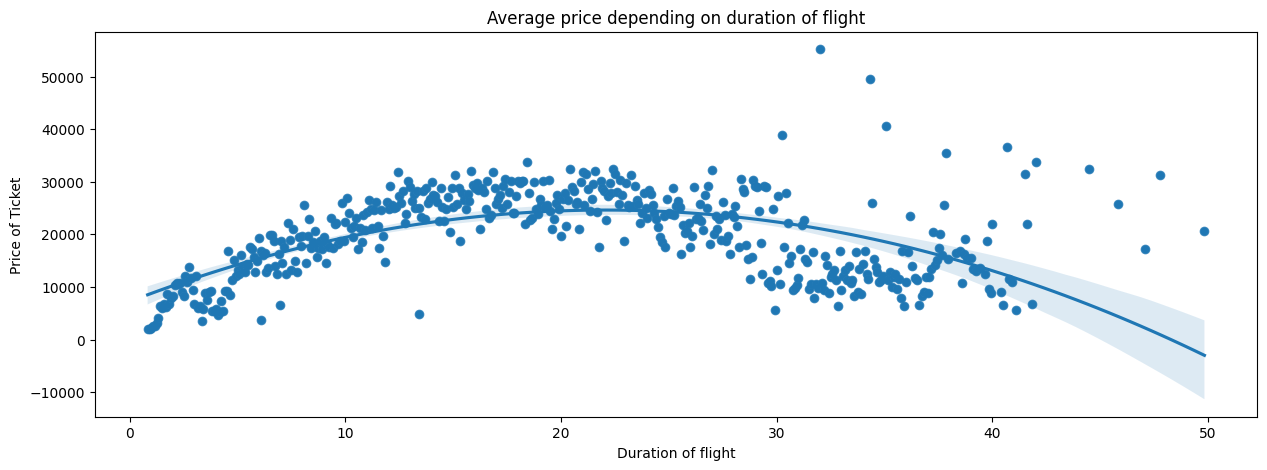

In [47]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)

The figure shows that the relationship between flight duration and ticket prices isn't a straight line. Initially, prices increase steadily with flight duration until about 20 hours, after which they start to decrease.

##### 8. How does ticket price vary according to departure time and arrival time?

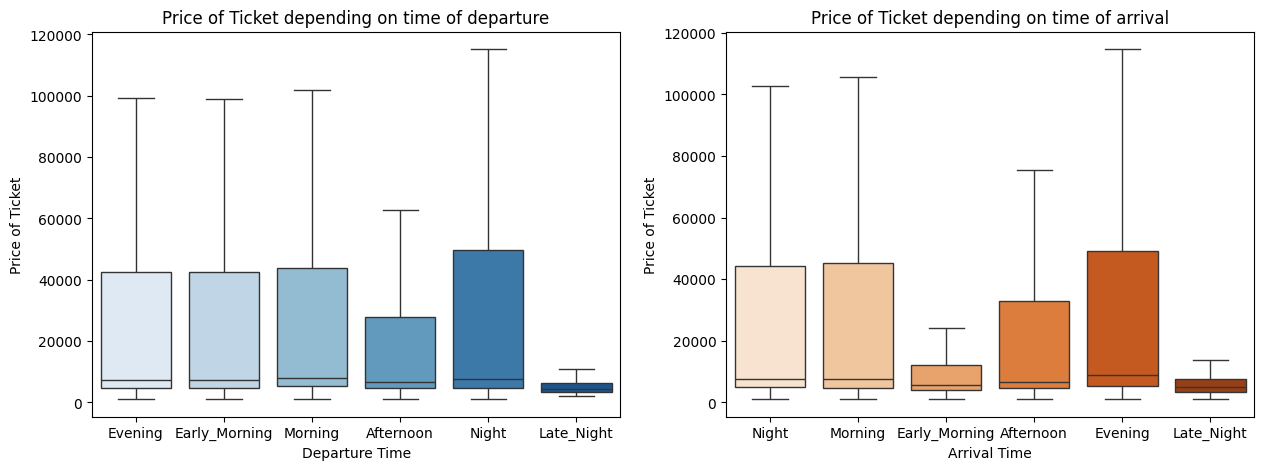

In [48]:
plt.figure(figsize=(15,5))
#For Departure
plt.subplot (1,2,1)
sns.boxplot(data = df,x = 'departure_time', y = 'price', showfliers = False, palette='Blues').set(
    xlabel = 'Departure Time',
    ylabel = 'Price of Ticket',
    title ='Price of Ticket depending on time of departure')
#For Arrival
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False, palette='Oranges').set(
    xlabel = 'Arrival Time',
    ylabel = 'Price of Ticket',
    title = 'Price of Ticket depending on time of arrival')
plt.show()

From the figure above, we can see that flights departing late at night tend to be the most affordable. Additionally, flights arriving early in the morning and late at night are also priced lower. Afternoon departures are relatively cheaper.

##### 9. How does ticket price vary depending on source and destination?

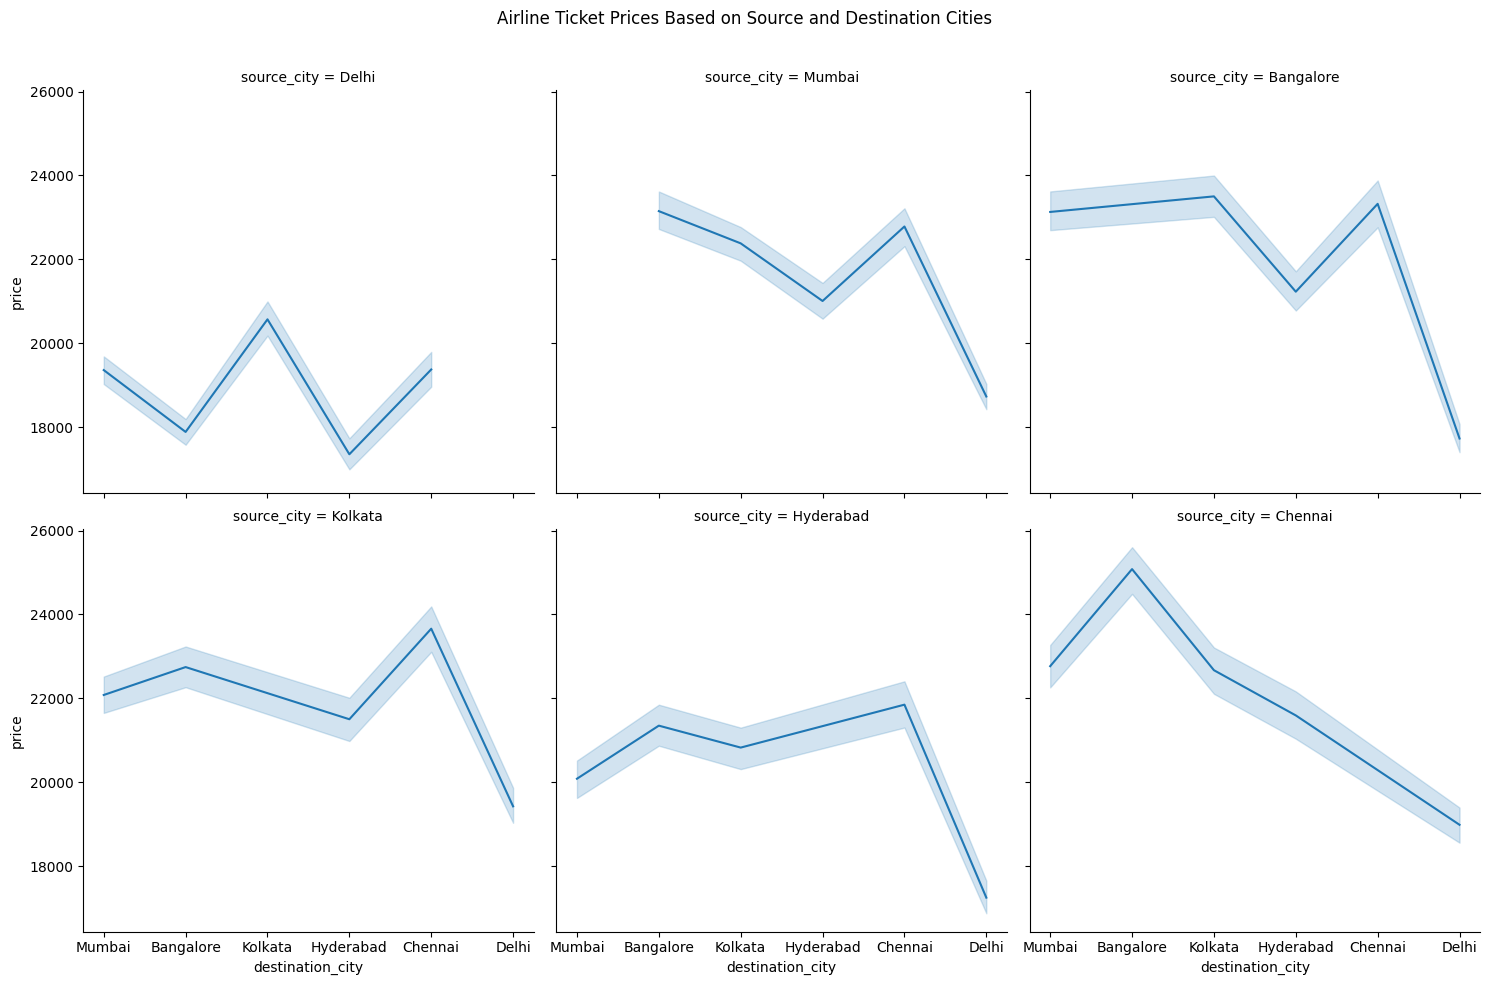

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.relplot(x='destination_city', y='price', col='source_city', col_wrap=3, kind='line', data=df)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline Ticket Prices Based on Source and Destination Cities')
plt.show()


The figure indicates that flights from Delhi are generally cheaper, due to strong connectivity and high flight frequency. While, the Chennai to Bangalore route is the most expensive, with Hyderabad being the costliest city to fly to.

##### 10. How does price of tickets vary based on no. of stops and airline?

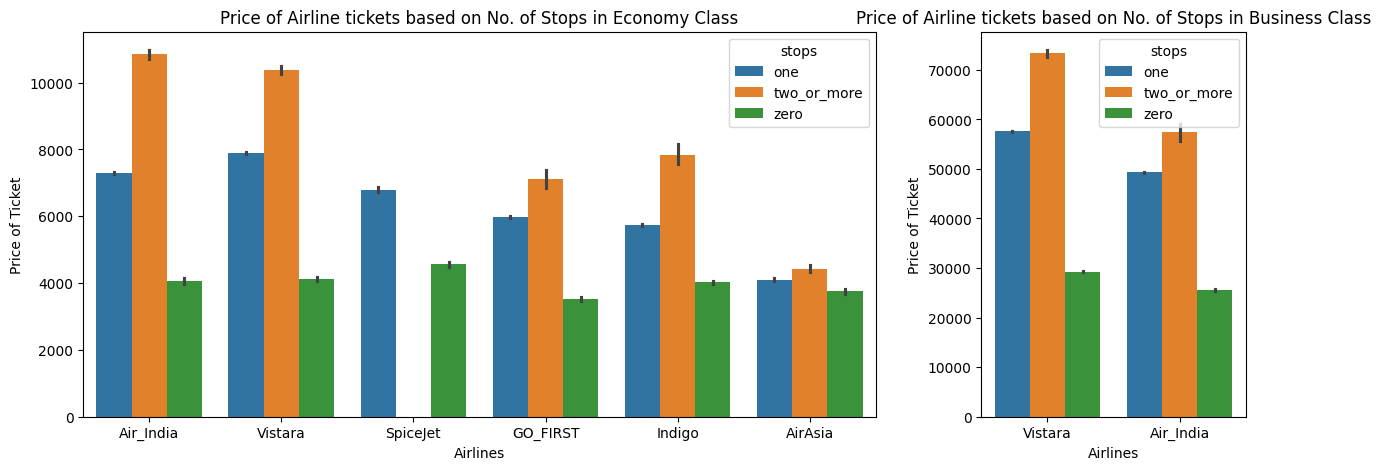

In [50]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
#For Economy class
sns.barplot(y = 'price',
            x = 'airline', hue = 'stops',
            data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines',
           ylabel='Price of Ticket',
           title='Price of Airline tickets based on No. of Stops in Economy Class')

#For Business class
sns.barplot(y='price',
            x='airline', hue='stops',
            data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines',
           ylabel='Price of Ticket',
           title='Price of Airline tickets based on No. of Stops in Business Class')

plt.show(fig, axs)

The figure indicates that Non-Stop flights are usually the cheapest, followed by One-Stop flights, with 2+ Stop flights being the most expensive due to the higher costs associated with additional operations. Air Asia shows little price variation between its Non-Stop, One-Stop, and 2+ Stop flights.